In [1]:
import os


In [2]:
%pwd


'c:\\Users\\Lenovo\\Desktop\\stb_pfe_mlflow\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\Lenovo\\Desktop\\stb_pfe_mlflow'

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [6]:
df= pd.read_csv("artifacts/data_cleaning/clean_data.csv")
df.head()

,tiers_key,ca,TOTMVTC,TOTMVTD,TOTMVTCnet,TOTMVTDnet,ENG,MontImp,encours,Encours_Moyen_Debiteur,...,Code_Classe,Code_Profession,Profession,Code_Activite_Economique,Activite_Economique,Code_secteur_activite,Secteur_Activite,Ville,Date_Ouverture,ancienneté
0,174,139474.073,0.00,-274.96,0.00,-261.17,0,0.0,0.0,1420.500876,...,1.0,P1099,AUTRES COMMERCANTS ET ASSIMILES,HAB99,TRANSPORTS FERROVIAIRES DE FRET,HA,TRANSPORTS ET ENTREPOSAGE,BAB BHAR,1958-04-05,66
1,370,139474.073,0.00,-483.78,0.00,-450.69,0,0.0,0.0,2311.483331,...,1.0,P1099,AUTRES COMMERCANTS ET ASSIMILES,GCG99,AUTRES COMMERCES DE DETAIL DE BIENS NEUFS EN M...,GB,COMMERCE; REPARATION D'AUTOMOBILES ET DE MOTOC...,TUNIS,1992-04-14,32
2,481,139474.073,3485166.04,-3473246.26,2971426.56,-3521324.16,0,0.0,0.0,1832.362192,...,0.0,P1099,AUTRES COMMERCANTS ET ASSIMILES,DAA04,COMMERCE D'ELECTRICITE,DA,"PRODUCTION ET DISTRIBUTION D'ELECTRICITE, DE G...",TUNIS BELVEDERE,2000-01-01,24
3,578,139474.073,0.00,-362.46,0.00,-341.15,0,0.0,0.0,1500.732704,...,0.0,P1099,AUTRES COMMERCANTS ET ASSIMILES,CWA01,FABRICATION DE MEUBLES DE BUREAU ET DE MAGASIN,CW,INDUSTRIE MANUFACTURIERE,TUNIS BELVEDERE,1992-05-07,32
4,633,3171.408,3224.32,-7610.75,3224.32,-7610.75,0,0.0,0.0,1832.362192,...,0.0,P1099,AUTRES COMMERCANTS ET ASSIMILES,GBG05,COMMERCE DE GROS DE QUINCAILLERIE ET FOURNITUR...,GB,COMMERCE; REPARATION D'AUTOMOBILES ET DE MOTOC...,REPUBLIQUE,1992-02-20,32


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

df.drop(columns=["Date_Ouverture"], inplace=True)
# 2. Séparation des colonnes numériques et catégorielles
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Remplir les valeurs manquantes pour les colonnes numériques et catégorielles
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  # Pour les colonnes numériques
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])  # Pour les colonnes catégorielles

# 3. Encodage des variables catégorielles
categorical_cols = ['ENG', 'Code_Profession', 'Profession', 'Code_Activite_Economique',
                    'Activite_Economique', 'Code_secteur_activite', 'Secteur_Activite', 'Ville']

# Utilisation de OneHotEncoder pour les variables non-ordinales
encoded_data = pd.get_dummies(df, columns=categorical_cols)

# 4. Normalisation des variables numériques
scaler = StandardScaler()
encoded_data[numeric_cols] = scaler.fit_transform(encoded_data[numeric_cols])

# 5. Détermination du nombre optimal de clusters avec la méthode Elbow
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(encoded_data)
    inertia.append(kmeans.inertia_)



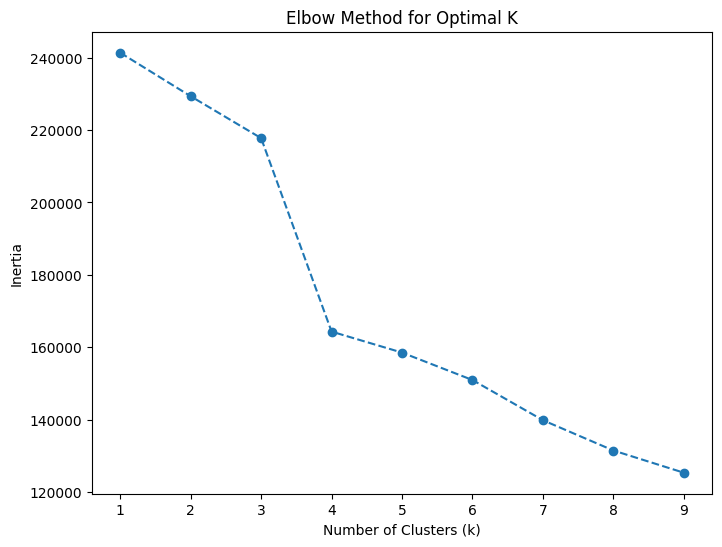

In [8]:
   
# Tracer la courbe pour visualiser l'Elbow
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()




In [9]:
# 6. Clustering avec K-Means (choix de k optimal)
k_optimal = 3  # Ajuster selon le résultat de l'Elbow ou Silhouette Score
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(encoded_data)


In [11]:
# Ajouter les labels de cluster au dataframe original
df['Cluster'] = kmeans.labels_

In [12]:

# Afficher le nombre de clients dans chaque cluster
print(df['Cluster'].value_counts())


Cluster
2    6743
1    4657
0    1546
Name: count, dtype: int64


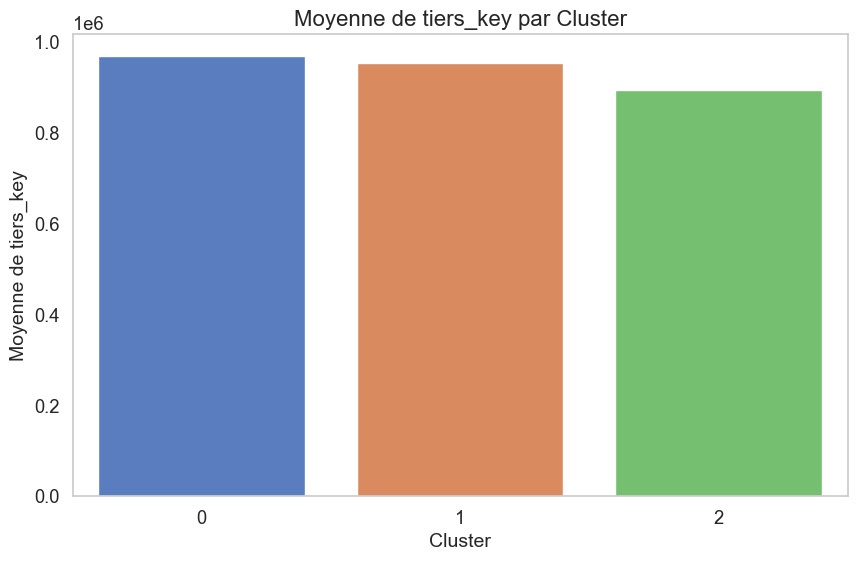

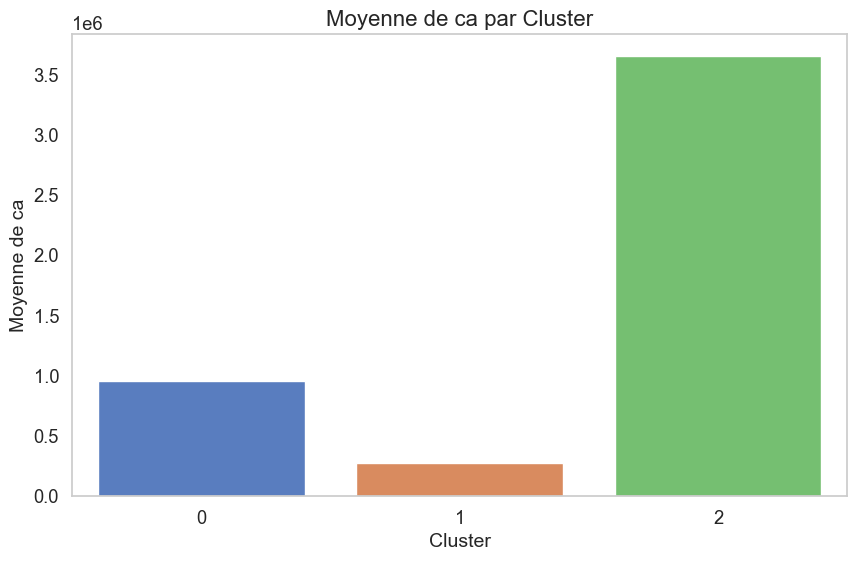

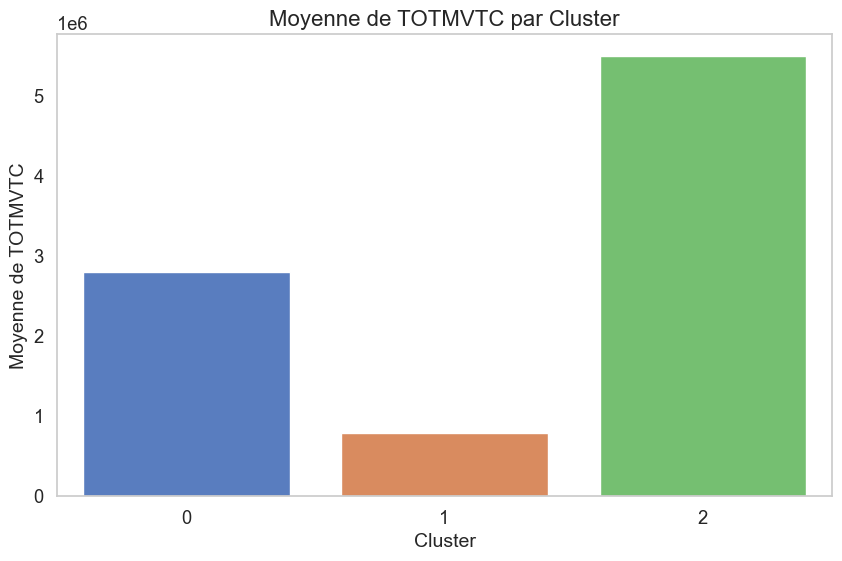

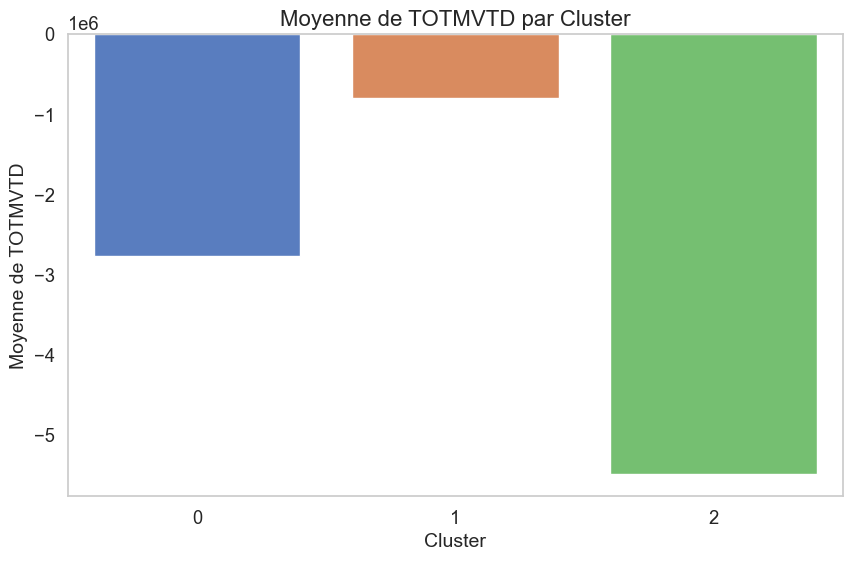

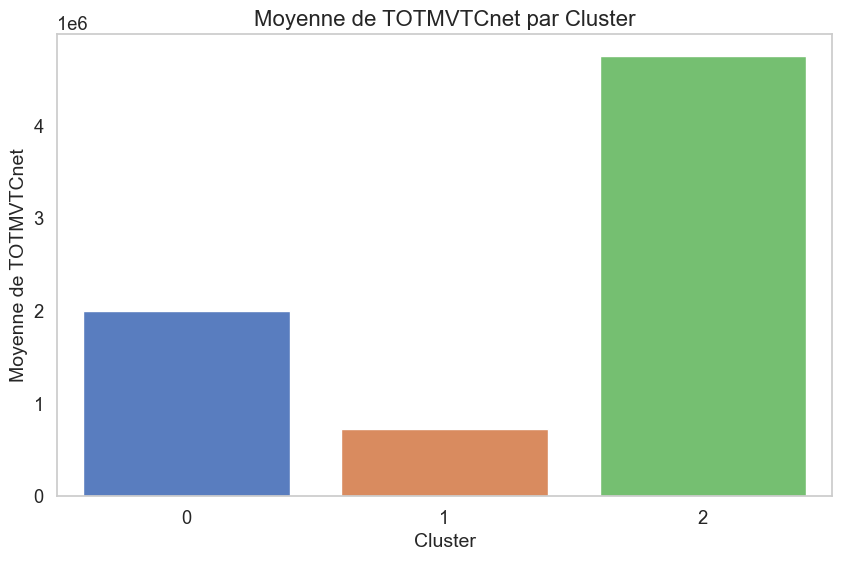

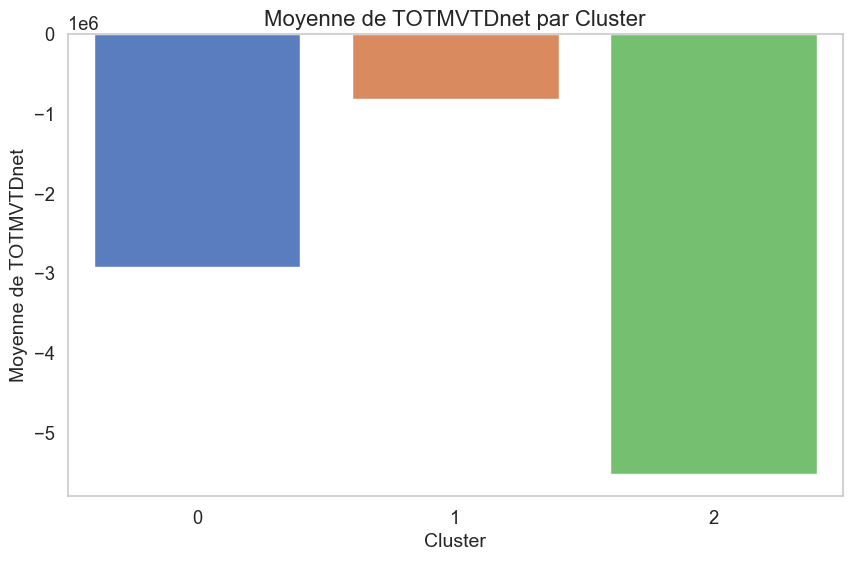

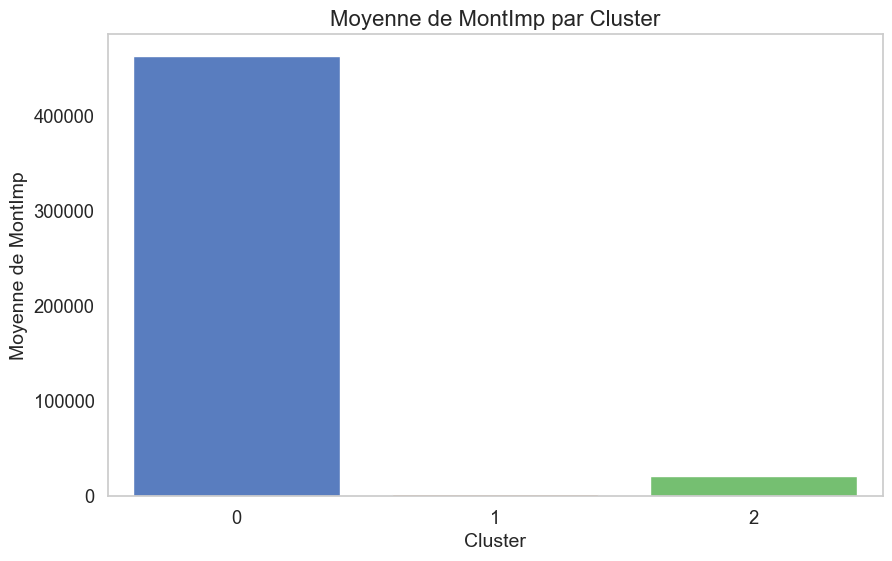

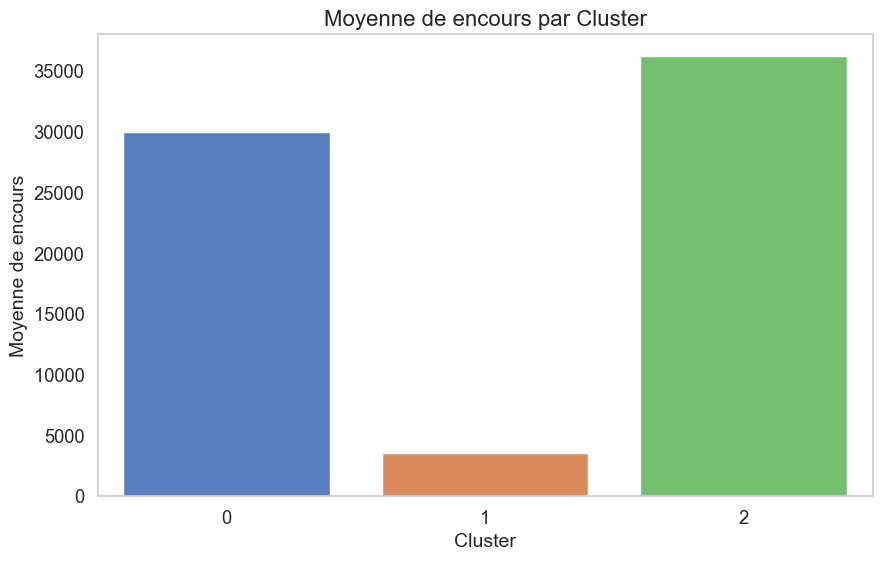

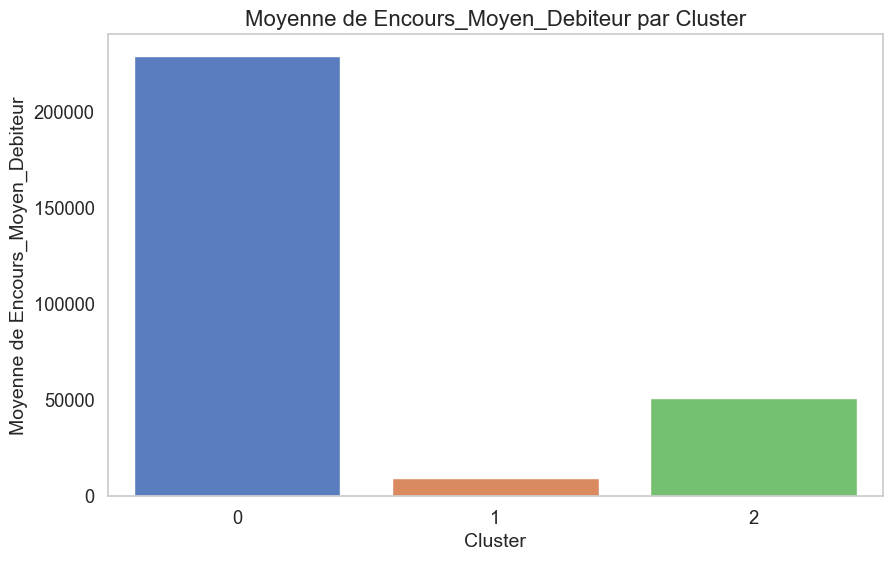

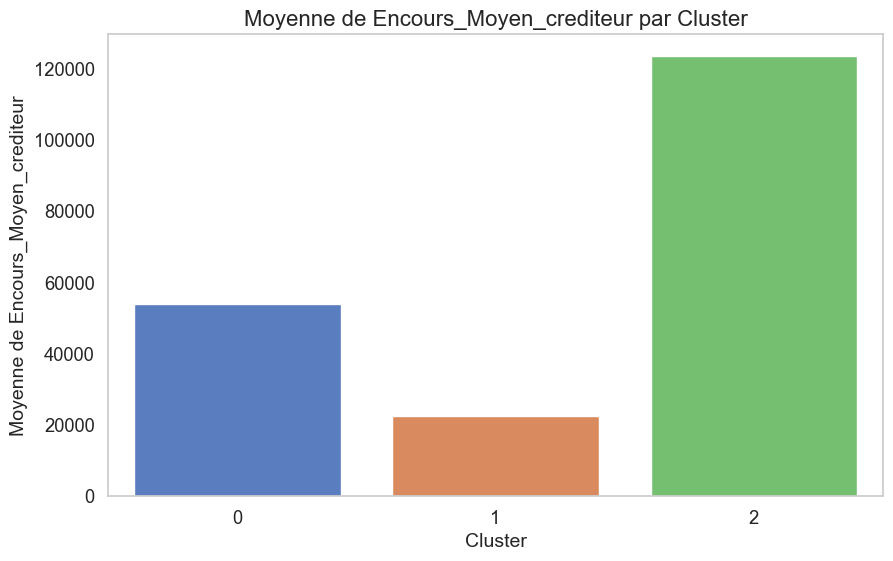

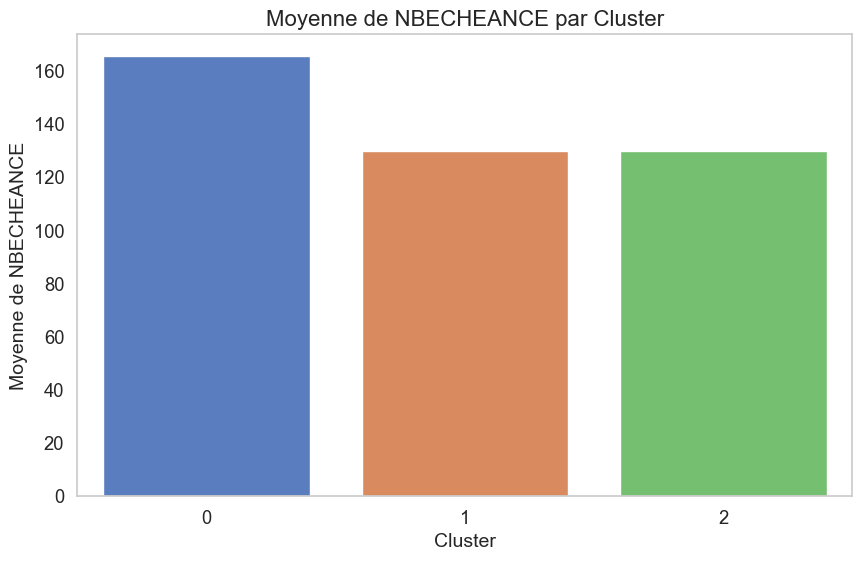

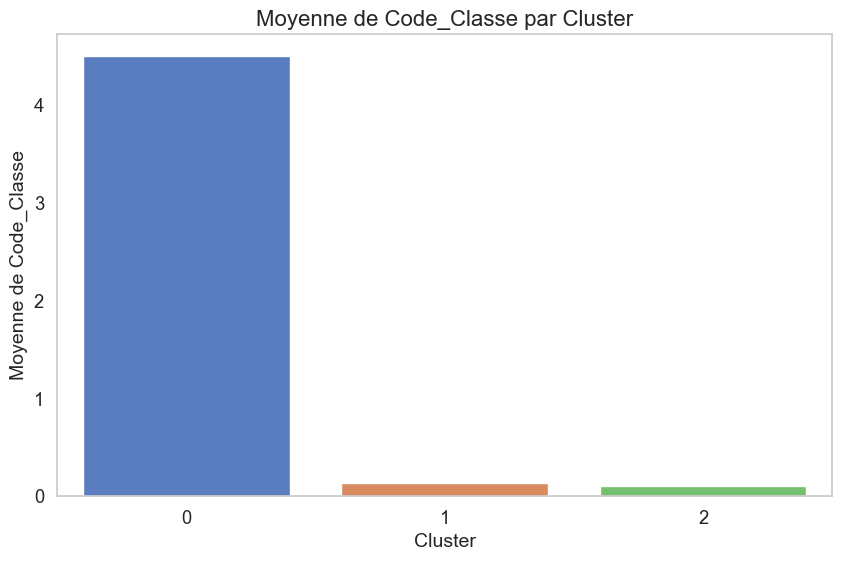

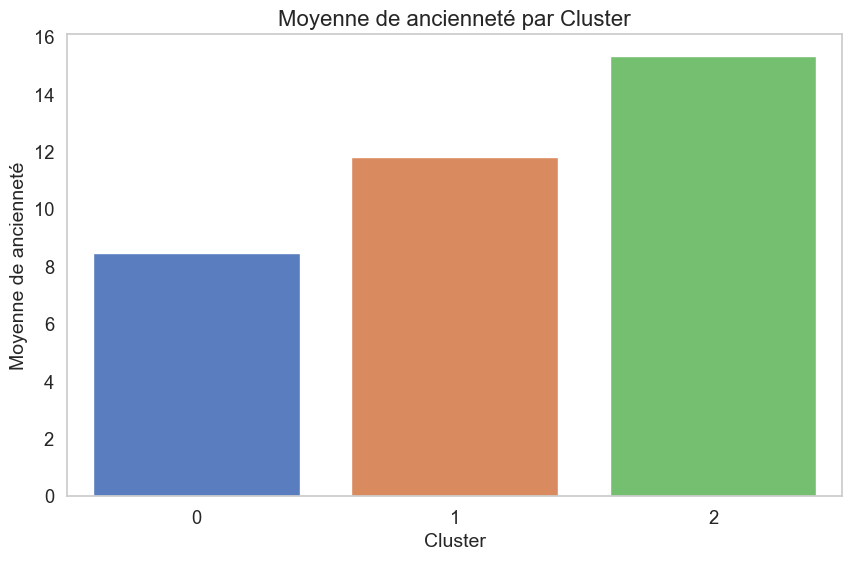

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les colonnes numériques
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Créer un bar plot pour chaque colonne numérique
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    mean_values = df.groupby('Cluster')[col].mean().reset_index()  # Calculer la moyenne par cluster
    sns.barplot(x='Cluster', y=col, data=mean_values, palette='muted')
    plt.title(f'Moyenne de {col} par Cluster', fontsize=16)
    plt.xlabel('Cluster', fontsize=14)
    plt.ylabel(f'Moyenne de {col}', fontsize=14)
    plt.grid(axis='y')
    plt.show()


Voici l'analyse et l'interprétation des données que vous avez fournies, en classant les trois clusters selon leurs caractéristiques financières :
1. Cluster 0 :
* CA (Chiffre d'Affaires) : 1.0 – Cela représente un chiffre d'affaires modéré par rapport aux autres clusters.
* TOTMVTC (Transactions de Crédit) : 2.9 – Les transactions de crédit sont positives et modérées.
* TOTMVTD (Transactions de Débit) : -2.9 – Cela indique un niveau d'endettement, mais relativement équilibré avec les transactions de crédit.
* Montant Impayé (MontImp) : 450,000 – Un montant impayé élevé, ce qui pourrait indiquer une gestion risquée ou un endettement significatif.
* Encours Moyen : 30,000 – Montant modéré d’encours, reflétant une situation de crédit encore gérable.
* Encours Moyen Débiteur : 250,000 – Très élevé, ce qui montre une dépendance importante au crédit et un risque potentiel de défaut.
* Nombre d’Échéances (NBECHEANCE) : 160 – Un nombre d’échéances plus élevé, ce qui peut indiquer une structure de crédit étendue et potentiellement risquée.
* Code Classe (Moyenne) : 4 – Code classe plus élevé, probablement indiquant une activité ou une profession plus à risque.
* Ancienneté : 9 – Une ancienneté modérée qui suggère une expérience moyenne, mais pas assez longue pour indiquer une solidité financière.
- Interprétation : Cluster 0 est à haut risque en raison de l’endettement important et des échéances nombreuses. Malgré un CA raisonnable et des transactions modérées, les montants élevés impayés et   le crédit débiteur important placent ce groupe dans une catégorie éligible avec prudence et limites. Un suivi strict est nécessaire.

2. Cluster 1 :
* CA : 0.3 – Chiffre d'affaires très faible, ce qui pourrait indiquer une faible capacité à générer des revenus.
* TOTMVTC : 0.75 – Faible volume de transactions de crédit.
* TOTMVTD : -0.75 – Faibles transactions de débit également, indiquant peu d'activité.
* MontImp : 0 – Aucun montant impayé, ce qui pourrait indiquer un faible risque de non-paiement.
* Encours Moyen : 3,000 – Très faible encours, ce qui suggère peu de dépendance au crédit.
* Encours Moyen Débiteur : 10,000 – Relativement faible, indiquant une faible utilisation de crédit.
* Nombre d’Échéances : 120 – Moins d’échéances par rapport à Cluster 0.
* Code Classe (Moyenne) : 0 – Code classe minimal, peut-être indiquant une profession à faible risque.
* Ancienneté : 12 – Une ancienneté plus longue, ce qui pourrait refléter une stabilité financière accrue avec le temps.
- Interprétation : Cluster 1 présente très peu de risques. Le CA est faible, mais l’absence de dettes et de montants impayés, combinée avec un faible recours au crédit, fait de ce groupe un candidat éligible à 100 % pour le crédit. Il s'agit probablement d'un groupe à faible risque qui peut continuer à bénéficier du crédit sans restrictions.

3. Cluster 2 :
* CA : 3.5 – Très élevé par rapport aux autres clusters, ce qui montre une forte capacité de génération de revenus.
* TOTMVTC : 6.0 – Volume important de transactions de crédit, indiquant un usage intense du crédit.
* TOTMVTD : -5.5 – Important montant de débit, suggérant une gestion active des dettes.
* MontImp : 20,000 – Présence de montants impayés, bien que pas excessivement élevés.
* Encours Moyen : 35,000 – Relativement élevé, ce qui pourrait indiquer une dépendance au crédit.
* Encours Moyen Débiteur : 70,000 – Débiteur important, montrant que ce groupe utilise beaucoup de crédit.
* Nombre d’Échéances : 120 – Nombre d'échéances similaire au Cluster 1, suggérant une structure de crédit active.
* Code Classe (Moyenne) : 2 – Code classe modéré, peut-être une profession à risque intermédiaire.
* Ancienneté : 15 – Ancienneté plus élevée, ce qui peut indiquer une bonne expérience et une stabilité financière.
- Interprétation : Cluster 2 montre une forte utilisation du crédit avec un montant élevé d’encours et de transactions de crédit et de débit. Bien que ce groupe génère un CA élevé et semble relativement stable, les montants impayés et l'usage intensif du crédit suggèrent qu’il doit être surveillé de près. Ce groupe est éligible au crédit, mais avec des limites et des précautions.

## Conclusion:
### Cluster 1 : Faible risque, éligible à 100% pour le crédit.=>Client à faible risque (sain) : "Client à profil de risque optimal" ou "Client avec une santé financière solide."

### Cluster 0 : Risque modéré à élevé, éligible au crédit, mais avec prudence et limites.=>Client à risque modéré : "Client à profil de risque intermédiaire" ou "Client présentant une stabilité financière relative 

### Cluster 2 : Fort potentiel mais usage intensif du crédit, éligible avec restrictions et suivi strict.=>Client à risque insuffisant (mais pas assez sain) : "Client à profil de risque acceptable" ou "Client en situation de vulnérabilité financière.

////Client éligible au crédit : "Client conforme aux critères d'éligibilité" ou "Client avec un profil de crédit favorable."

Client non éligible au crédit : "Client non conforme aux critères d'éligibilité" ou "Client à risque de crédit élevé."

Client éligible au crédit avec restrictions : "Client soumis à des conditions spécifiques" ou "Client à évaluation conditionnelle de crédit."

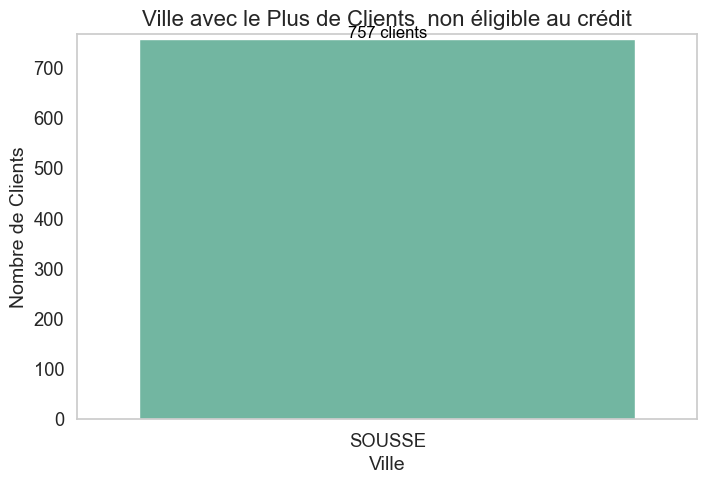

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour ne conserver que le cluster 0
filtered_df = df[df['Cluster'] == 0]

# Compter le nombre d'occurrences de chaque ville pour le cluster 0
city_cluster_count = filtered_df['Ville'].value_counts()

# Identifier la ville avec le maximum de clients
max_city = city_cluster_count.idxmax()
max_count = city_cluster_count.max()

# Créer un DataFrame pour la visualisation
max_city_df = pd.DataFrame({ 'Ville': [max_city], 'Count': [max_count] })

# Visualisation
plt.figure(figsize=(8, 5))
sns.barplot(data=max_city_df, x='Ville', y='Count', palette='Set2')

# Annoter la valeur sur la barre
plt.text(0, max_count + 2, f'{max_count} clients', ha='center', color='black', fontsize=12)

plt.title('Ville avec le Plus de Clients  non éligible au crédit', fontsize=16)
plt.xlabel('Ville', fontsize=14)
plt.ylabel('Nombre de Clients', fontsize=14)
plt.ylim(0, max_count + 10)  # Ajuster l'axe y pour l'annotation
plt.grid(axis='y')

# Afficher le graphique
plt.show()


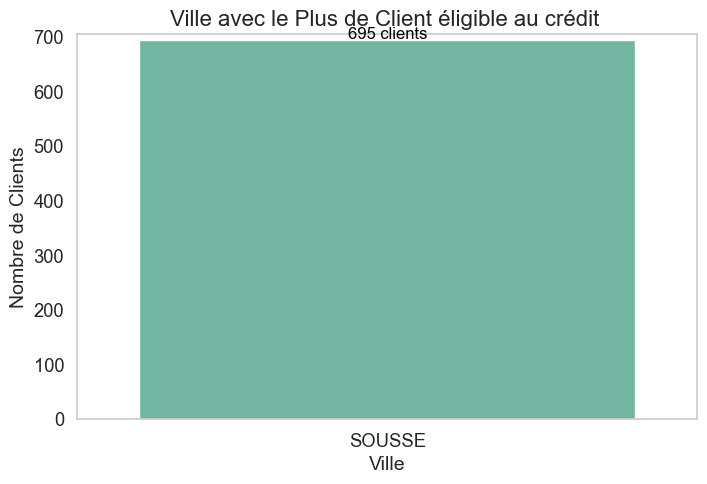

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour ne conserver que le cluster 0
filtered_df = df[df['Cluster'] == 1]

# Compter le nombre d'occurrences de chaque ville pour le cluster 0
city_cluster_count = filtered_df['Ville'].value_counts()

# Identifier la ville avec le maximum de clients
max_city = city_cluster_count.idxmax()
max_count = city_cluster_count.max()

# Créer un DataFrame pour la visualisation
max_city_df = pd.DataFrame({ 'Ville': [max_city], 'Count': [max_count] })

# Visualisation
plt.figure(figsize=(8, 5))
sns.barplot(data=max_city_df, x='Ville', y='Count', palette='Set2')

# Annoter la valeur sur la barre
plt.text(0, max_count + 2, f'{max_count} clients', ha='center', color='black', fontsize=12)

plt.title('Ville avec le Plus de Client éligible au crédit ', fontsize=16)
plt.xlabel('Ville', fontsize=14)
plt.ylabel('Nombre de Clients', fontsize=14)
plt.ylim(0, max_count + 10)  # Ajuster l'axe y pour l'annotation
plt.grid(axis='y')

# Afficher le graphique
plt.show()


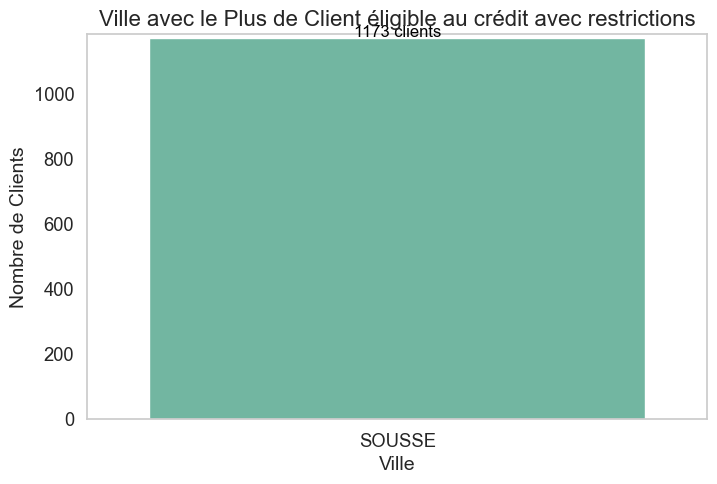

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour ne conserver que le cluster 1
filtered_df = df[df['Cluster'] == 2]

# Compter le nombre d'occurrences de chaque ville pour le cluster 1
city_cluster_count = filtered_df['Ville'].value_counts()

# Identifier la ville avec le maximum de clients
max_city = city_cluster_count.idxmax()
max_count = city_cluster_count.max()

# Créer un DataFrame pour la visualisation
max_city_df = pd.DataFrame({'Ville': [max_city], 'Count': [max_count]})

# Visualisation
plt.figure(figsize=(8, 5))
sns.barplot(data=max_city_df, x='Ville', y='Count', palette='Set2')

# Annoter la valeur sur la barre
plt.text(0, max_count + 2, f'{max_count} clients', ha='center', color='black', fontsize=12)

plt.title('Ville avec le Plus de Client éligible au crédit avec restrictions', fontsize=16)
plt.xlabel('Ville', fontsize=14)
plt.ylabel('Nombre de Clients', fontsize=14)
plt.ylim(0, max_count + 10)  # Ajuster l'axe y pour l'annotation
plt.grid(axis='y')

# Afficher le graphique
plt.show()


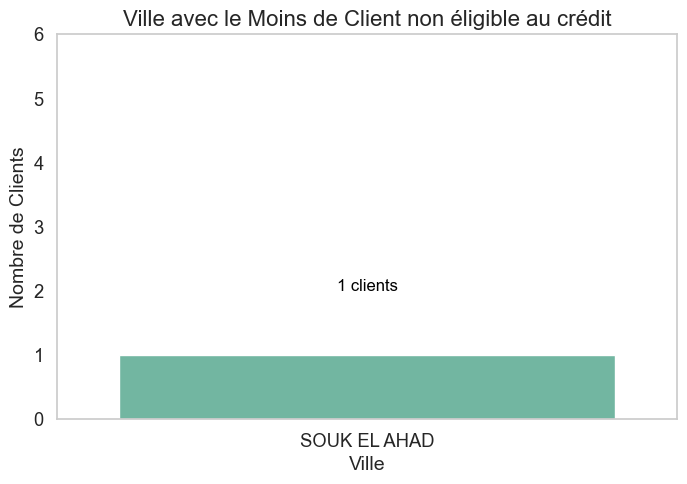

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour ne conserver que le cluster 0
filtered_df = df[df['Cluster'] == 0]

# Compter le nombre d'occurrences de chaque ville pour le cluster 0
city_cluster_count = filtered_df['Ville'].value_counts()

# Identifier la ville avec le minimum de clients
min_city = city_cluster_count.idxmin()
min_count = city_cluster_count.min()

# Créer un DataFrame pour la visualisation
min_city_df = pd.DataFrame({'Ville': [min_city], 'Count': [min_count]})

# Visualisation
plt.figure(figsize=(8, 5))
sns.barplot(data=min_city_df, x='Ville', y='Count', palette='Set2')

# Annoter la valeur sur la barre
plt.text(0, min_count + 1, f'{min_count} clients', ha='center', color='black', fontsize=12)

plt.title('Ville avec le Moins de Client non éligible au crédit', fontsize=16)
plt.xlabel('Ville', fontsize=14)
plt.ylabel('Nombre de Clients', fontsize=14)
plt.ylim(0, min_count + 5)  # Ajuster l'axe y pour l'annotation
plt.grid(axis='y')

# Afficher le graphique
plt.show()


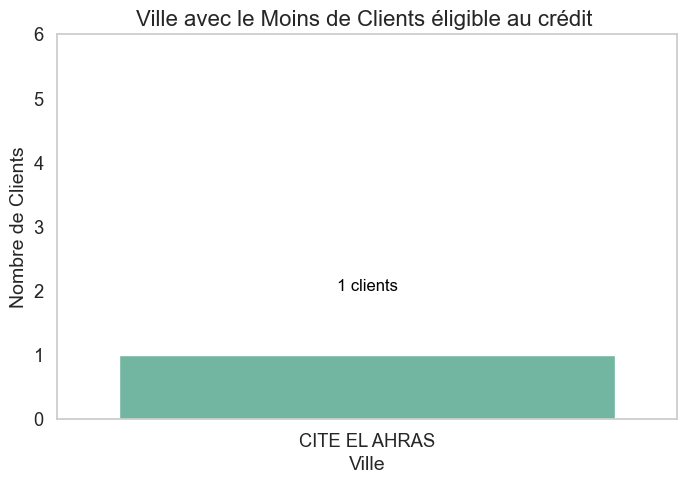

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour ne conserver que le cluster 0
filtered_df = df[df['Cluster'] == 1]

# Compter le nombre d'occurrences de chaque ville pour le cluster 0
city_cluster_count = filtered_df['Ville'].value_counts()

# Identifier la ville avec le minimum de clients
min_city = city_cluster_count.idxmin()
min_count = city_cluster_count.min()

# Créer un DataFrame pour la visualisation
min_city_df = pd.DataFrame({'Ville': [min_city], 'Count': [min_count]})

# Visualisation
plt.figure(figsize=(8, 5))
sns.barplot(data=min_city_df, x='Ville', y='Count', palette='Set2')

# Annoter la valeur sur la barre
plt.text(0, min_count + 1, f'{min_count} clients', ha='center', color='black', fontsize=12)

plt.title('Ville avec le Moins de Clients éligible au crédit ', fontsize=16)
plt.xlabel('Ville', fontsize=14)
plt.ylabel('Nombre de Clients', fontsize=14)
plt.ylim(0, min_count + 5)  # Ajuster l'axe y pour l'annotation
plt.grid(axis='y')

# Afficher le graphique
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour ne conserver que le cluster 0
filtered_df = df[df['Cluster'] == ]

# Compter le nombre d'occurrences de chaque ville pour le cluster 0
city_cluster_count = filtered_df['Ville'].value_counts()

# Identifier la ville avec le minimum de clients
min_city = city_cluster_count.idxmin()
min_count = city_cluster_count.min()

# Créer un DataFrame pour la visualisation
min_city_df = pd.DataFrame({'Ville': [min_city], 'Count': [min_count]})

# Visualisation
plt.figure(figsize=(8, 5))
sns.barplot(data=min_city_df, x='Ville', y='Count', palette='Set2')

# Annoter la valeur sur la barre
plt.text(0, min_count + 1, f'{min_count} clients', ha='center', color='black', fontsize=12)

plt.title('Ville avec le Moins de Clients dans le Cluster 0', fontsize=16)
plt.xlabel('Ville', fontsize=14)
plt.ylabel('Nombre de Clients', fontsize=14)
plt.ylim(0, min_count + 5)  # Ajuster l'axe y pour l'annotation
plt.grid(axis='y')

# Afficher le graphique
plt.show()


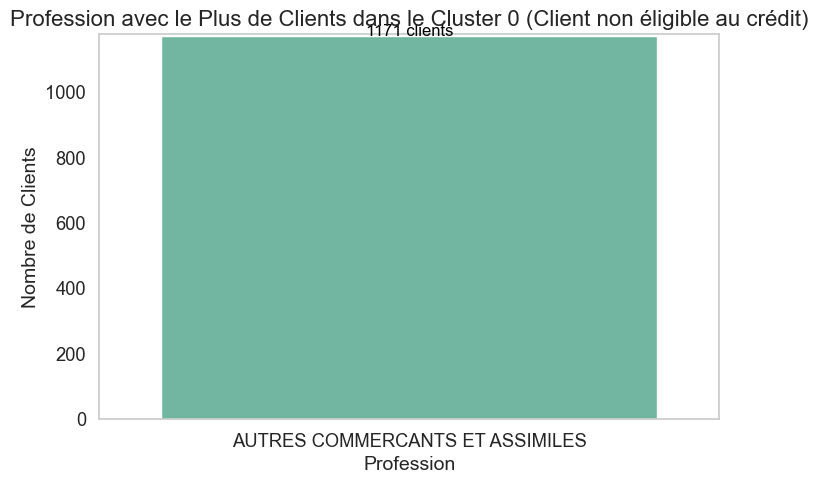

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour ne conserver que le cluster 0
filtered_df = df[df['Cluster'] == 0]

# Compter le nombre d'occurrences de chaque profession pour le cluster 0
profession_cluster_count = filtered_df['Profession'].value_counts()

# Identifier la profession avec le maximum de clients
max_profession = profession_cluster_count.idxmax()
max_count = profession_cluster_count.max()

# Créer un DataFrame pour la visualisation
max_profession_df = pd.DataFrame({'Profession': [max_profession], 'Count': [max_count]})

# Visualisation
plt.figure(figsize=(8, 5))
sns.barplot(data=max_profession_df, x='Profession', y='Count', palette='Set2')

# Annoter la valeur sur la barre
plt.text(0, max_count + 1, f'{max_count} clients', ha='center', color='black', fontsize=12)

plt.title('Profession avec le Plus de Clients dans le Cluster 0 (Client non éligible au crédit)', fontsize=16)
plt.xlabel('Profession', fontsize=14)
plt.ylabel('Nombre de Clients', fontsize=14)
plt.ylim(0, max_count + 5)  # Ajuster l'axe y pour l'annotation
plt.grid(axis='y')

# Afficher le graphique
plt.show()


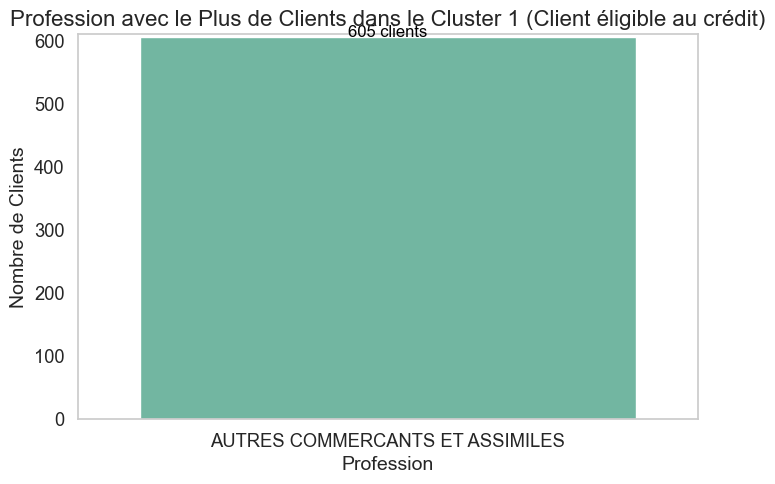

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour ne conserver que le cluster 1
filtered_df = df[df['Cluster'] == 1]

# Compter le nombre d'occurrences de chaque profession pour le cluster 1
profession_cluster_count = filtered_df['Profession'].value_counts()

# Identifier la profession avec le maximum de clients
max_profession = profession_cluster_count.idxmax()
max_count = profession_cluster_count.max()

# Créer un DataFrame pour la visualisation
max_profession_df = pd.DataFrame({'Profession': [max_profession], 'Count': [max_count]})

# Visualisation
plt.figure(figsize=(8, 5))
sns.barplot(data=max_profession_df, x='Profession', y='Count', palette='Set2')

# Annoter la valeur sur la barre
plt.text(0, max_count + 1, f'{max_count} clients', ha='center', color='black', fontsize=12)

plt.title('Profession avec le Plus de Clients dans le Cluster 1 (Client éligible au crédit)', fontsize=16)
plt.xlabel('Profession', fontsize=14)
plt.ylabel('Nombre de Clients', fontsize=14)
plt.ylim(0, max_count + 5)  # Ajuster l'axe y pour l'annotation
plt.grid(axis='y')

# Afficher le graphique
plt.show()


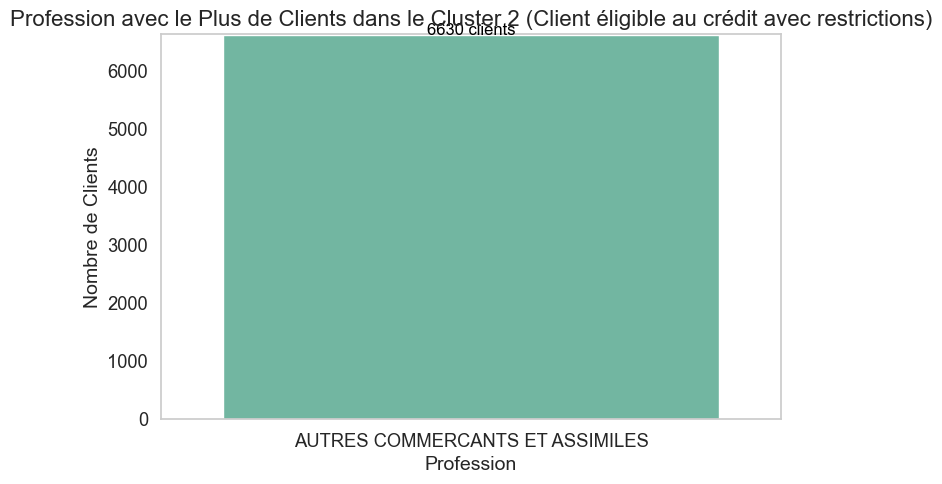

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour ne conserver que le cluster 2
filtered_df = df[df['Cluster'] == 2]

# Compter le nombre d'occurrences de chaque profession pour le cluster 2
profession_cluster_count = filtered_df['Profession'].value_counts()

# Identifier la profession avec le maximum de clients
max_profession = profession_cluster_count.idxmax()
max_count = profession_cluster_count.max()

# Créer un DataFrame pour la visualisation
max_profession_df = pd.DataFrame({'Profession': [max_profession], 'Count': [max_count]})

# Visualisation
plt.figure(figsize=(8, 5))
sns.barplot(data=max_profession_df, x='Profession', y='Count', palette='Set2')

# Annoter la valeur sur la barre
plt.text(0, max_count + 1, f'{max_count} clients', ha='center', color='black', fontsize=12)

plt.title('Profession avec le Plus de Clients dans le Cluster 2 (Client éligible au crédit avec restrictions)', fontsize=16)
plt.xlabel('Profession', fontsize=14)
plt.ylabel('Nombre de Clients', fontsize=14)
plt.ylim(0, max_count + 5)  # Ajuster l'axe y pour l'annotation
plt.grid(axis='y')

# Afficher le graphique
plt.show()


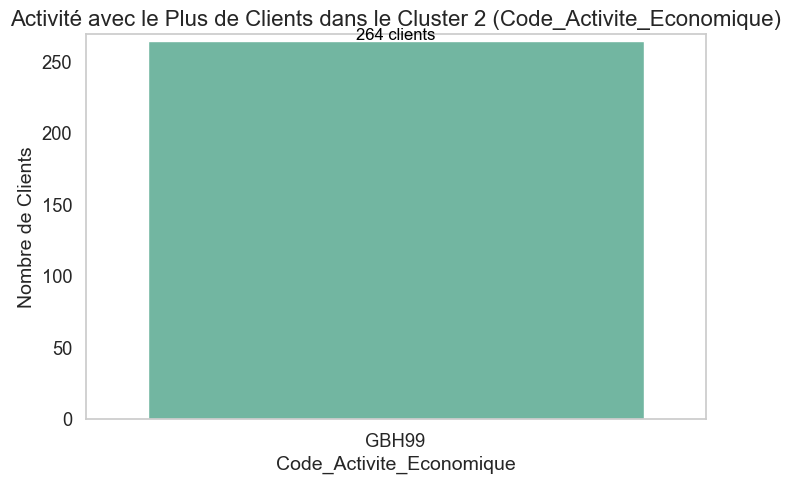

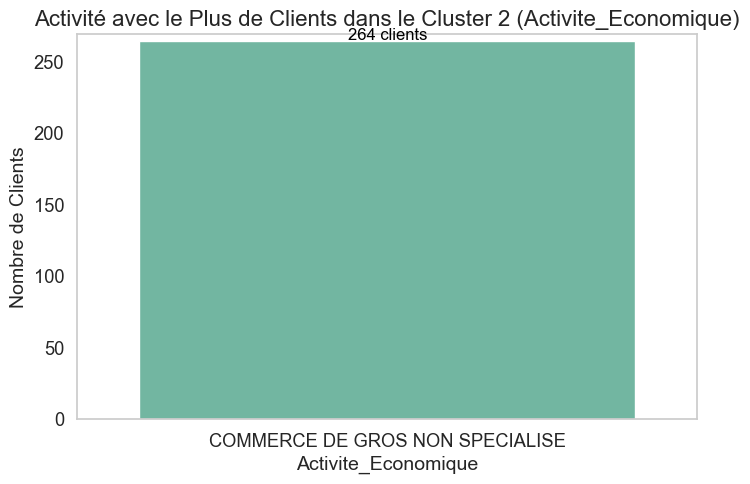

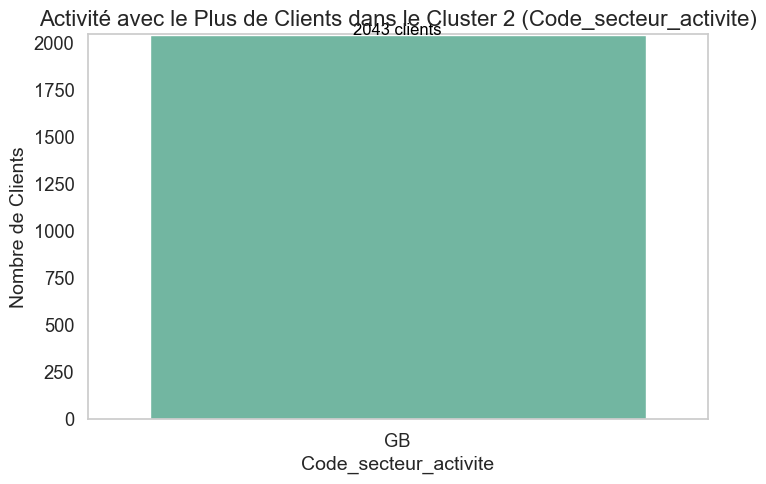

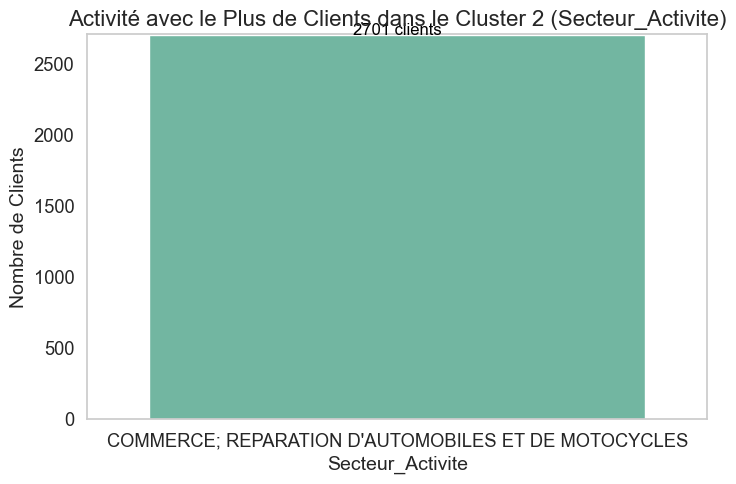

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des colonnes à visualiser
columns_to_visualize = ['Code_Activite_Economique', 'Activite_Economique', 'Code_secteur_activite', 'Secteur_Activite']

# Filtrer les données pour ne conserver que le cluster 2
filtered_df = df[df['Cluster'] == 2]

# Visualiser chaque colonne dans la liste
for column in columns_to_visualize:
    # Compter le nombre d'occurrences de chaque valeur pour la colonne
    activity_count = filtered_df[column].value_counts()
    
    # Identifier l'activité avec le maximum de clients
    max_activity = activity_count.idxmax()
    max_count = activity_count.max()
    
    # Créer un DataFrame pour la visualisation
    max_activity_df = pd.DataFrame({'Activité': [max_activity], 'Count': [max_count]})
    
    # Visualisation
    plt.figure(figsize=(8, 5))
    sns.barplot(data=max_activity_df, x='Activité', y='Count', palette='Set2')

    # Annoter la valeur sur la barre
    plt.text(0, max_count + 1, f'{max_count} clients', ha='center', color='black', fontsize=12)

    plt.title(f'Activité avec le Plus de Clients dans le Cluster 2 ({column})', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Nombre de Clients', fontsize=14)
    plt.ylim(0, max_count + 5)  # Ajuster l'axe y pour l'annotation
    plt.grid(axis='y')

    # Afficher le graphique
    plt.show()


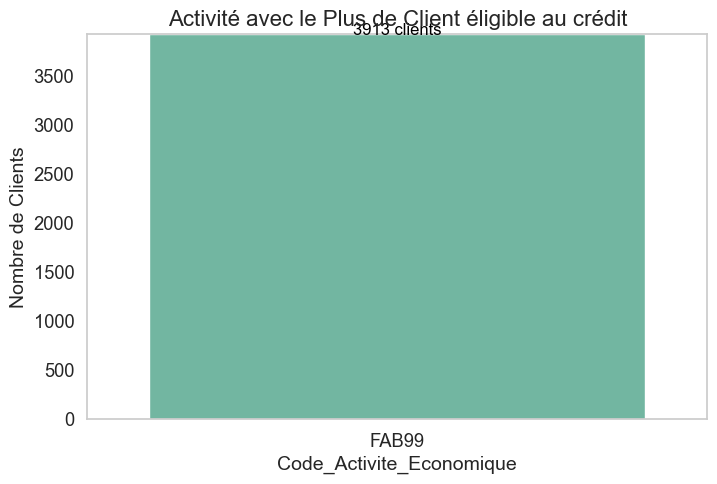

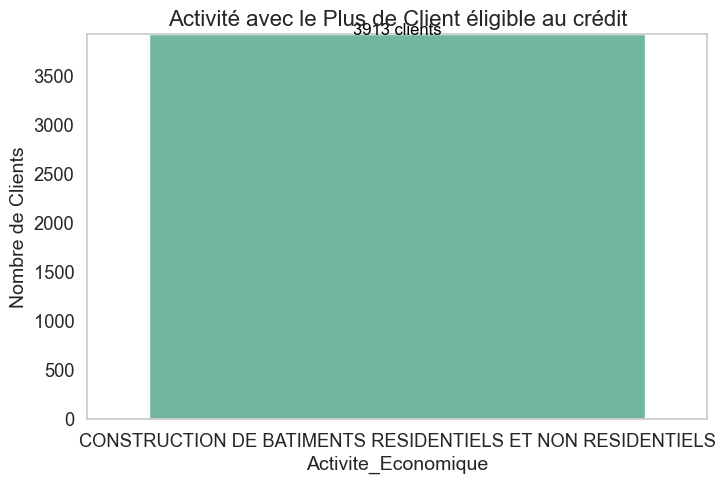

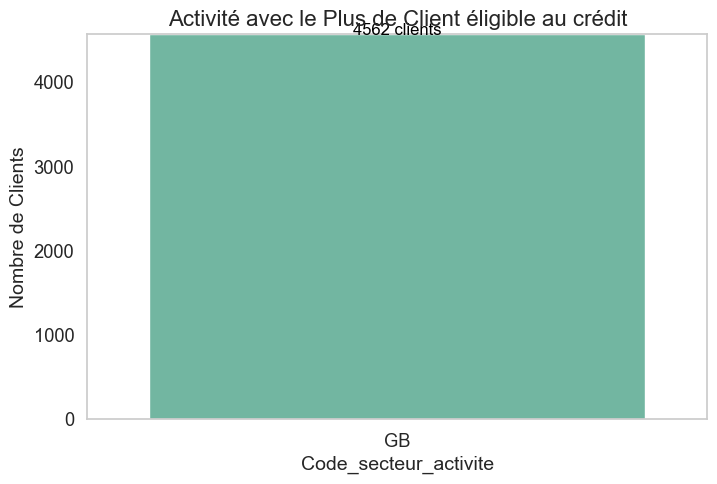

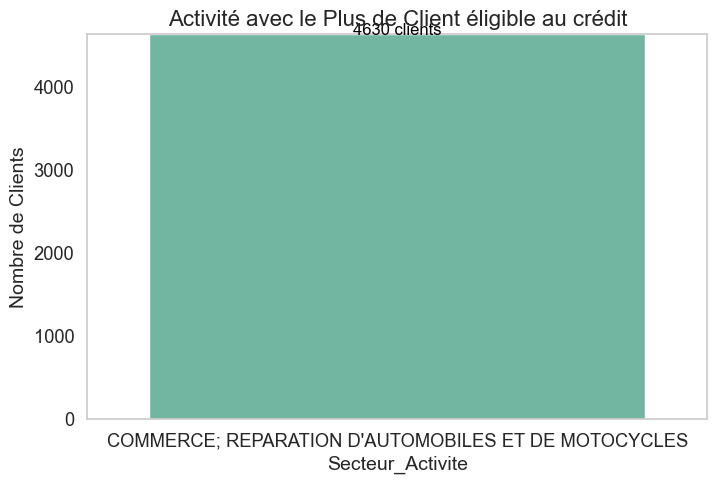

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des colonnes à visualiser
columns_to_visualize = ['Code_Activite_Economique', 'Activite_Economique', 'Code_secteur_activite', 'Secteur_Activite']

# Filtrer les données pour ne conserver que le cluster 1 (Client éligible au crédit)
filtered_df = df[df['Cluster'] == 1]

# Visualiser chaque colonne dans la liste
for column in columns_to_visualize:
    # Compter le nombre d'occurrences de chaque valeur pour la colonne
    activity_count = filtered_df[column].value_counts()
    
    # Identifier l'activité avec le maximum de clients
    max_activity = activity_count.idxmax()
    max_count = activity_count.max()
    
    # Créer un DataFrame pour la visualisation
    max_activity_df = pd.DataFrame({'Activité': [max_activity], 'Count': [max_count]})
    
    # Visualisation
    plt.figure(figsize=(8, 5))
    sns.barplot(data=max_activity_df, x='Activité', y='Count', palette='Set2')

    # Annoter la valeur sur la barre
    plt.text(0, max_count + 1, f'{max_count} clients', ha='center', color='black', fontsize=12)

    plt.title('Activité avec le Plus de Client éligible au crédit', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Nombre de Clients', fontsize=14)
    plt.ylim(0, max_count + 5)  # Ajuster l'axe y pour l'annotation
    plt.grid(axis='y')

    # Afficher le graphique
    plt.show()


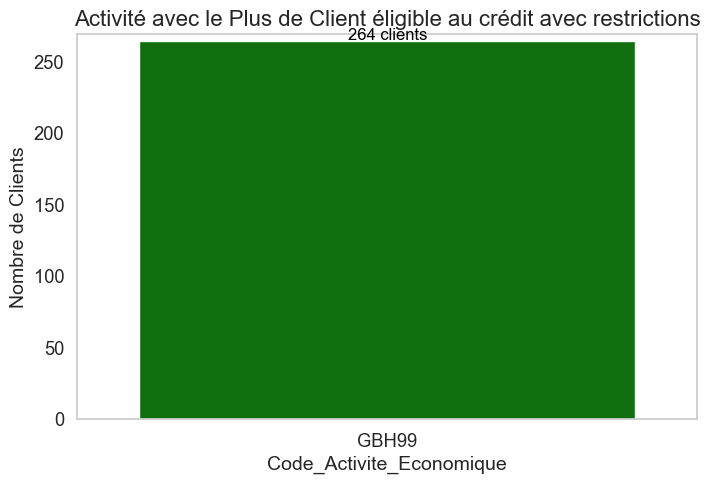

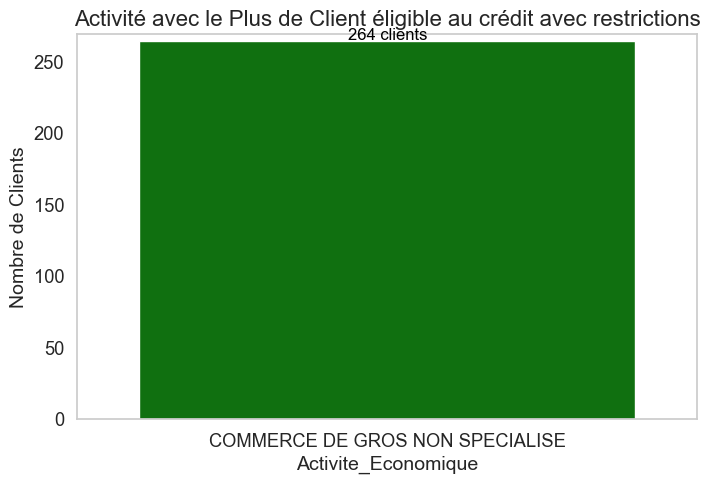

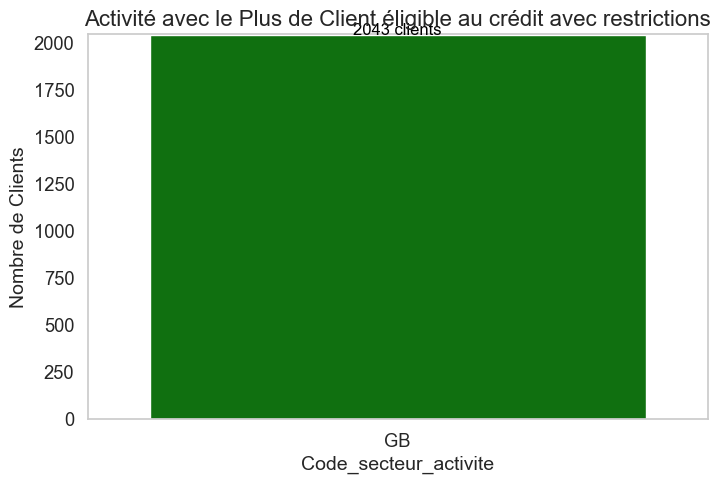

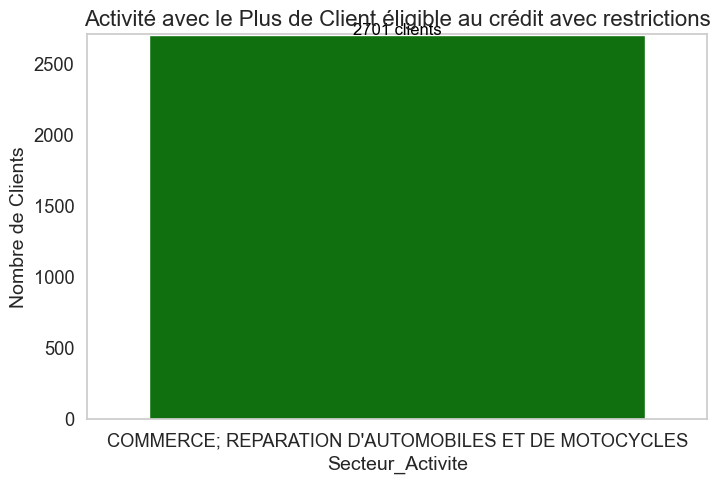

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des colonnes à visualiser
columns_to_visualize = ['Code_Activite_Economique', 'Activite_Economique', 'Code_secteur_activite', 'Secteur_Activite']

# Filtrer les données pour ne conserver que le cluster 2 (Client éligible au crédit avec restrictions)
filtered_df = df[df['Cluster'] == 2]

# Visualiser chaque colonne dans la liste
for column in columns_to_visualize:
    # Compter le nombre d'occurrences de chaque valeur pour la colonne
    activity_count = filtered_df[column].value_counts()
    
    # Identifier l'activité avec le maximum de clients
    max_activity = activity_count.idxmax()
    max_count = activity_count.max()
    
    # Créer un DataFrame pour la visualisation
    max_activity_df = pd.DataFrame({'Activité': [max_activity], 'Count': [max_count]})
    
    # Visualisation
    plt.figure(figsize=(8, 5))
    sns.barplot(data=max_activity_df, x='Activité', y='Count', color='green')  # Couleur verte

    # Annoter la valeur sur la barre
    plt.text(0, max_count + 1, f'{max_count} clients', ha='center', color='black', fontsize=12)

    plt.title('Activité avec le Plus de Client éligible au crédit avec restrictions', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Nombre de Clients', fontsize=14)
    plt.ylim(0, max_count + 5)  # Ajuster l'axe y pour l'annotation
    plt.grid(axis='y')

    # Afficher le graphique
    plt.show()


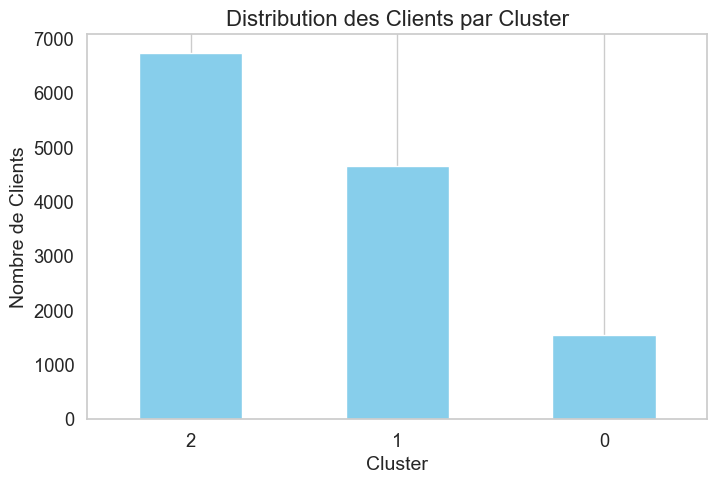

In [58]:
plt.figure(figsize=(8, 5))
df['Cluster'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution des Clients par Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Nombre de Clients', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Visualisation : Un diagramme à barres ou un camembert montrant la distribution des clients dans chaque cluster. Cela vous permettrait de voir rapidement quelle proportion de clients appartient à chaque catégorie

In [64]:
df

,tiers_key,ca,TOTMVTC,TOTMVTD,TOTMVTCnet,TOTMVTDnet,ENG,MontImp,encours,Encours_Moyen_Debiteur,...,Code_Classe,Code_Profession,Profession,Code_Activite_Economique,Activite_Economique,Code_secteur_activite,Secteur_Activite,Ville,ancienneté,Cluster
0,174,139474.073,0.00,-274.96,0.00,-261.17,0,0.000,0.0,1420.500876,...,1.0,P1099,AUTRES COMMERCANTS ET ASSIMILES,HAB99,TRANSPORTS FERROVIAIRES DE FRET,HA,TRANSPORTS ET ENTREPOSAGE,BAB BHAR,66,2
1,370,139474.073,0.00,-483.78,0.00,-450.69,0,0.000,0.0,2311.483331,...,1.0,P1099,AUTRES COMMERCANTS ET ASSIMILES,GCG99,AUTRES COMMERCES DE DETAIL DE BIENS NEUFS EN M...,GB,COMMERCE; REPARATION D'AUTOMOBILES ET DE MOTOC...,TUNIS,32,2
2,481,139474.073,3485166.04,-3473246.26,2971426.56,-3521324.16,0,0.000,0.0,1832.362192,...,0.0,P1099,AUTRES COMMERCANTS ET ASSIMILES,DAA04,COMMERCE D'ELECTRICITE,DA,"PRODUCTION ET DISTRIBUTION D'ELECTRICITE, DE G...",TUNIS BELVEDERE,24,2
3,578,139474.073,0.00,-362.46,0.00,-341.15,0,0.000,0.0,1500.732704,...,0.0,P1099,AUTRES COMMERCANTS ET ASSIMILES,CWA01,FABRICATION DE MEUBLES DE BUREAU ET DE MAGASIN,CW,INDUSTRIE MANUFACTURIERE,TUNIS BELVEDERE,32,2
4,633,3171.408,3224.32,-7610.75,3224.32,-7610.75,0,0.000,0.0,1832.362192,...,0.0,P1099,AUTRES COMMERCANTS ET ASSIMILES,GBG05,COMMERCE DE GROS DE QUINCAILLERIE ET FOURNITUR...,GB,COMMERCE; REPARATION D'AUTOMOBILES ET DE MOTOC...,REPUBLIQUE,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12941,1708225,524269.210,684269.21,-558030.31,524269.21,-548694.70,160000,0.000,160000.0,107985.578093,...,1.0,P1099,AUTRES COMMERCANTS ET ASSIMILES,GAB99,ENTRETIEN ET REPARATION DE VEHICULES AUTOMOBILES,GA,COMMERCE; REPARATION D'AUTOMOBILES ET DE MOTOC...,HAMMAMET,11,2
12942,1708249,139474.073,0.00,-749.35,0.00,-708.34,"19539,306",19539.306,0.0,2903.787734,...,0.0,P0999,AUTRES ENTREPRENEURS INDIVIDUELS ARTISANS,FAB99,CONSTRUCTION DE BATIMENTS RESIDENTIELS ET NON ...,GB,COMMERCE; REPARATION D'AUTOMOBILES ET DE MOTOC...,HAMMAMET,29,1
12943,1708255,139474.073,3485166.04,-3473246.26,2971426.56,-3521324.16,0,0.000,0.0,4189.035660,...,0.0,P1001,COMMERCANT DANS L'ALIMENTATION GENERALE,FAB99,CONSTRUCTION DE BATIMENTS RESIDENTIELS ET NON ...,GB,COMMERCE; REPARATION D'AUTOMOBILES ET DE MOTOC...,HAMMAMET,17,1
12944,1708266,1195027.312,1204817.31,-1200642.24,1204817.31,-1198949.92,0,0.000,0.0,662.289635,...,0.0,P1099,AUTRES COMMERCANTS ET ASSIMILES,GCE04,COMMERCE DE DETAIL D'APPAREILS ELECTROMENAGERS...,GC,COMMERCE; REPARATION D'AUTOMOBILES ET DE MOTOC...,HAMMAMET,22,2
